# EDA Blizzard DF
### Imports

In [2]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import statistics
import ctypes
from datetime import datetime


### Load the csv

In [3]:
start=datetime.now()
display(f"({start}) Loading csv file ...")
Blizzard_Commodities_DF=pd.read_csv('commodities_data.csv')
Blizzard_Commodities_DF.shape
display(f"(Time to load : {datetime.now()-start}")

'(2024-01-10 10:09:07.547135) Loading csv file ...'

'(Time to load : 0:00:59.815273'

### Modify columns

In [4]:
start=datetime.now()
print(f"({start}) Re-Casting id columns ...")
# Change datedime columns to datetime
Blizzard_Commodities_DF['datetime'] = pd.to_datetime(Blizzard_Commodities_DF['datetime'])
# Change id columns to string
Blizzard_Commodities_DF['id']=Blizzard_Commodities_DF['id'].astype(str)
Blizzard_Commodities_DF['item.id']=Blizzard_Commodities_DF['item.id'].astype(str)
print(f"(Time to cast : {datetime.now()-start}")

(2024-01-10 10:10:07.370924) Re-Casting id columns ...
(Time to cast : 0:00:46.192543


## List of unique Auction id's

In [38]:
len(Blizzard_Commodities_DF)

79852830

In [39]:
Blizzard_Commodities_DF['datetime'].min()

Timestamp('2023-12-22 18:41:00')

In [35]:
unique_id=Blizzard_Commodities_DF['id'].unique()
len(unique_id)

6964297

In [37]:
Blizzard_Commodities_DF.loc[Blizzard_Commodities_DF['id']==unique_id[0]]

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
0,1899749198,15,109400,SHORT,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-28 15:41:00
1416644,1899749198,15,109400,LONG,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-28 07:41:00
5646298,1899749198,15,109400,VERY_LONG,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-27 23:41:00
6145238,1899749198,15,109400,VERY_LONG,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-26 17:41:00
7377082,1899749198,15,109400,VERY_LONG,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-27 07:41:00
7634577,1899749198,15,109400,VERY_LONG,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-27 19:41:00
8491359,1899749198,15,109400,VERY_LONG,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-27 15:41:00
8886539,1899749198,15,109400,VERY_LONG,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-26 21:41:00
10006159,1899749198,15,109400,VERY_LONG,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-26 19:41:00
10403504,1899749198,15,109400,VERY_LONG,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-27 21:41:00


### Identify Classes

In [88]:
item_class_df=pd.DataFrame(Blizzard_Commodities_DF['item.class'].value_counts())
item_class_df['percentge']=(item_class_df['count']/item_class_df['count'].sum())*100
item_class_df.reset_index(inplace=True)
item_class_df

,item.class,count,percentge
0,Trade Goods,43471369,54.439359
1,Consumables,19247503,24.103721
2,Unknown,7323232,9.170911
3,Miscellaneous,6179978,7.739210
4,Gems,2865191,3.588089
5,Glyphs,734695,0.920061
6,Armor,24651,0.030871
7,Recipes,6211,0.007778


## For plotting : Merge the labels and values of the 3 lower appearing into 1

In [89]:
labels = item_class_df['item.class']
labels[2]=labels[2]+'(Uncategorized)'
labels[5]=labels[5]+','+labels[6]+','+labels[7]
labels.pop(6)
labels.pop(7)
sizes = item_class_df['count']
sizes[5]=sizes[5]+sizes[6]+sizes[7]
sizes.pop(6)
sizes.pop(7)


C:\Users\Fidel\AppData\Local\Temp\ipykernel_16088\1008178546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[2]=labels[2]+'(Uncategorized)'
C:\Users\Fidel\AppData\Local\Temp\ipykernel_16088\1008178546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[5]=labels[5]+','+labels[6]+','+labels[7]
C:\Users\Fidel\AppData\Local\Temp\ipykernel_16088\1008178546.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sizes[5]=sizes

6211

([<matplotlib.patches.Wedge at 0x296982c2690>,
 [Text(-0.15291620598705902, 1.089319344336877, 'Trade Goods'),
  Text(-0.5604681419760648, -0.946506979282191, 'Consumables'),
  Text(0.5376962077458959, -0.9596263794705118, 'Unknown(Uncategorized)'),
  Text(0.9497440499398159, -0.5549650796256613, 'Miscellaneous'),
  Text(1.0835874362212887, -0.18930997877390032, 'Gems'),
  Text(1.0995010979139033, -0.03312605750948136, 'Glyphs,Armor,Recipes')],
 [Text(-0.08340883962930491, 0.5941741878201147, '54.4%'),
  Text(-0.305709895623308, -0.5162765341539223, '24.1%'),
  Text(0.29328884058867044, -0.523432570620279, '9.2%'),
  Text(0.5180422090580813, -0.30270822525036073, '7.7%'),
  Text(0.5910476924843393, -0.10325998842212744, '3.6%'),
  Text(0.5997278715894017, -0.018068758641535284, '1.0%')])

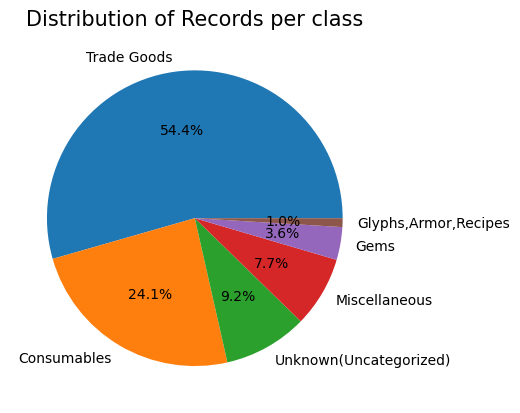

In [148]:
fig, ax = plt.subplots()
ax.set_title("Distribution of Records per class", fontsize=15)  # Add a title to the axes.
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [78]:
# xticks=[]
# for x in range(26):
#     xticks.append(x*2)
# yticks=[5000, 25000, 125000, 625000, 3125000, 15625000, 46875000]
steps=15
yticks=[]
step=item_class_df['count'].max()/steps
for y in range(steps+1):
    yticks.append(int(y*step))

yticks

[0,
 2898091,
 5796182,
 8694273,
 11592365,
 14490456,
 17388547,
 20286638,
 23184730,
 26082821,
 28980912,
 31879003,
 34777095,
 37675186,
 40573277,
 43471369]

## Items in the "Trade Goods" class

In [102]:
trade_goods_items_df=pd.DataFrame(Blizzard_Commodities_DF.loc[Blizzard_Commodities_DF['item.class']=='Trade Goods'])
trade_goods_items_df['item.name'].value_counts()

item.name
Hochenblume                  497568
Adamant Scales               465241
Resilient Leather            454930
Draconium Ore                402335
Saxifrage                    400026
                              ...  
Stringy Vulture Meat             96
Goretusk Snout                   66
Savage Taladite Amplifier        29
Flawless Pearl                   23
Burnished Essence                 8
Name: count, Length: 1854, dtype: int64

In [114]:
trade_goods_item_counts_df=pd.DataFrame(trade_goods_items_df['item.name'].value_counts())
trade_goods_item_counts_df.reset_index(inplace=True)
trade_goods_item_counts_df

,item.name,count
0,Hochenblume,497568
1,Adamant Scales,465241
2,Resilient Leather,454930
3,Draconium Ore,402335
4,Saxifrage,400026
...,...,...
1849,Stringy Vulture Meat,96
1850,Goretusk Snout,66
1851,Savage Taladite Amplifier,29
1852,Flawless Pearl,23


In [119]:
trade_goods_item_counts_df['count'].sum()

43471369

In [146]:
slice=int(1854/10)
trade_goods_item_counts_df['count'].iloc[:slice].sum()/trade_goods_item_counts_df['count'].sum()*100
# result=pd.DataFrame(trade_goods_item_counts_df['count'].iloc[:175].sum())
# result.reset_index(inplace=True)
# result.drop(0,axis=0)
# result.columns=['result','count']

47.85841918159973

In [147]:
trade_goods_item_counts_df['count'].iloc[:slice].sum()

20804710

In [135]:
# result.reset_index(inplace=True)
result

,result,count
0,item.name,HochenblumeAdamant ScalesResilient LeatherDrac...
1,count,20335608


<Axes: >

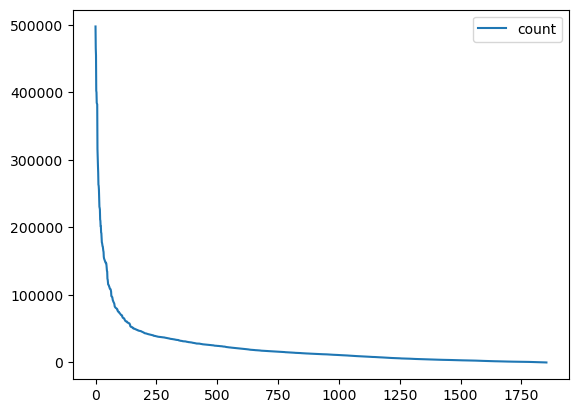

In [111]:
trade_goods_item_counts_df.plot()

## Items in the "Unknown" class

In [10]:
Unknown_class_items_df=pd.DataFrame(Blizzard_Commodities_DF.loc[Blizzard_Commodities_DF['item.class']=="Unknown"])

In [14]:
Unknown_class_items_df

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
17,1899751061,28,6300,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00
18,1899751205,84,6300,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00
24,1899752493,101,6300,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00
32,1899753275,24,7900,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00
39,1899753849,109,6300,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00
...,...,...,...,...,...,...,...,...
79852808,1910242792,1,80000,VERY_LONG,200024,Enchant Bracer - Writ of Avoidance,Unknown,2023-12-29 00:41:00
79852813,1910242820,2,1502200,LONG,200022,Enchant Bracer - Devotion of Leech,Unknown,2023-12-29 00:41:00
79852818,1910242834,2,2154500,VERY_LONG,199968,Enchant Weapon - Earthen Devotion,Unknown,2023-12-29 00:41:00
79852821,1910242836,1,69975500,VERY_LONG,200054,Enchant Weapon - Sophic Devotion,Unknown,2023-12-29 00:41:00


In [15]:
Blizzard_Commodities_DF['item.name'].value_counts()

item.name
Fluorescent Fluid            978744
Exceptional Pelt             665069
Hochenblume                  497568
Adamant Scales               465241
Resilient Leather            454930
                              ...  
Masterful Mana Buns               2
Blood Soaked Tail                 1
Emberflea Collection              1
Elemental-Distilled Water         1
Extra Large Grooming Comb         1
Name: count, Length: 7964, dtype: int64

In [16]:
Blizzard_Commodities_DF['id'].value_counts()

id
1892309585    50
1920662957    50
1920664843    50
1920664735    50
1892307074    50
              ..
1918269591     1
1918269568     1
1918269565     1
1918269561     1
1910242863     1
Name: count, Length: 6964297, dtype: int64

In [17]:
Blizzard_Commodities_DF['id'].value_counts().value_counts()

count
1     2109005
2      930071
12     612889
48     468105
24     463246
3      364507
4      231023
5      172418
6      138057
47     130531
7      119175
11     109887
8      103680
9       95134
10      87794
23      80167
13      66944
14      48638
15      43846
16      43304
17      39856
18      36378
19      36150
22      34809
20      34577
21      34281
25      30380
26      19407
49      17684
31      15871
27      15849
30      15120
28      15099
29      14466
33      14120
35      14097
34      13820
32      13618
36      12702
45      12670
46      12599
37      12515
38      12149
39      11890
40      11680
44      11604
43      11060
41      10683
42      10603
50        139
Name: count, dtype: int64

In [150]:
class_list=Blizzard_Commodities_DF['item.class'].unique()

In [153]:
class_item_count=[]
for item in class_list:
    print(item)
    temp_df=pd.DataFrame(Blizzard_Commodities_DF.loc[Blizzard_Commodities_DF['item.class']==item ])
    unique_id_list=temp_df['id'].unique()
    class_item_count.append(len(unique_id_list))
class_item_count

Consumables
Trade Goods
Gems
Glyphs
Unknown
Miscellaneous
Recipes
Armor


[1344589, 4404278, 188492, 64279, 674014, 287218, 336, 1374]

In [176]:
item_count_per_class_df=pd.DataFrame(class_item_count,class_list)
item_count_per_class_df.sort_values(0,inplace=True, ascending=False)
item_count_per_class_df.reset_index(inplace=True)
item_count_per_class_df.columns={'item.class','unique_items'}
item_count_per_class_df

,item.class,unique_items
0,Trade Goods,4404278
1,Consumables,1344589
2,Unknown,674014
3,Miscellaneous,287218
4,Gems,188492
5,Glyphs,64279
6,Armor,1374
7,Recipes,336


In [177]:
item_count_per_class_df

,item.class,unique_items
0,Trade Goods,4404278
1,Consumables,1344589
2,Unknown,674014
3,Miscellaneous,287218
4,Gems,188492
5,Glyphs,64279
6,Armor,1374
7,Recipes,336


In [175]:
sizes = item_class_df['count']
sizes

0    43471369
1    19247503
2     7323232
3     6179978
4     2865191
5      765557
Name: count, dtype: int64

In [178]:
labels = item_count_per_class_df['item.class']
labels[2]=labels[2]+' (Uncategorized)'
labels[5]=labels[5]+','+labels[6]+','+labels[7]
labels.pop(6)
labels.pop(7)
sizes = item_count_per_class_df['unique_items']
sizes[5]=sizes[5]+sizes[6]+sizes[7]
sizes.pop(6)
sizes.pop(7)


C:\Users\Fidel\AppData\Local\Temp\ipykernel_16088\4164508291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[2]=labels[2]+' (Uncategorized)'
C:\Users\Fidel\AppData\Local\Temp\ipykernel_16088\4164508291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[5]=labels[5]+','+labels[6]+','+labels[7]
C:\Users\Fidel\AppData\Local\Temp\ipykernel_16088\4164508291.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sizes[5]=size

336

([<matplotlib.patches.Wedge at 0x2969b1aa690>,
 [Text(-0.44440639757801353, 1.0062320576247472, 'Trade Goods'),
  Text(-0.1453170398713145, -1.0903590958592673, 'Consumables'),
  Text(0.7720893138987479, -0.7835037277278016, 'Unknown (Uncategorized)'),
  Text(1.029818685049644, -0.3866179974116855, 'Miscellaneous'),
  Text(1.0885266667193618, -0.15846039202537443, 'Gems'),
  Text(1.0995127214453362, -0.032737980693239535, 'Glyphs,Armor,Recipes')],
 [Text(-0.24240348958800736, 0.5488538496134985, '63.2%'),
  Text(-0.0792638399298079, -0.5947413250141458, '19.3%'),
  Text(0.42113962576295333, -0.42736566966970996, '9.7%'),
  Text(0.5617192827543512, -0.2108825440427375, '4.1%'),
  Text(0.5937418182105609, -0.08643294110474968, '2.7%'),
  Text(0.599734211697456, -0.017857080378130653, '0.9%')])

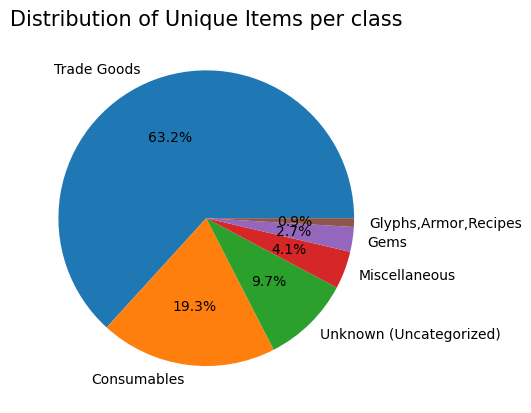

In [179]:
fig, ax = plt.subplots()
ax.set_title("Distribution of Unique Items per class", fontsize=15)  # Add a title to the axes.
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
